In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
data_set=pd.read_csv('TSLA.csv')

In [4]:
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [7]:
stock_data=data_set[["Date","Close"]]

In [8]:
stock_data

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Close   2956 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.3+ KB


In [10]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

/tmp/ipykernel_117/2574456454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data["Date"])


In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2956 non-null   datetime64[ns]
 1   Close   2956 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.3 KB


In [13]:
stock_data.set_index("Date")

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


### EDA of this Datasets

In [14]:
stock_data.describe()

,Close
count,2956.000000
mean,138.762183
std,250.123115
min,3.160000
25%,19.615000
50%,46.545000
75%,68.103998
max,1229.910034


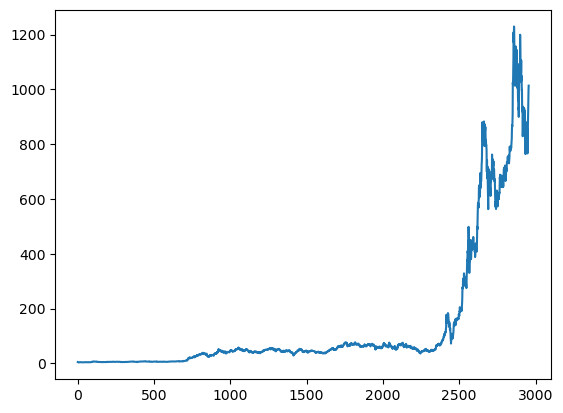

In [20]:
plt.plot(stock_data.Close)

(array([2435.,   86.,   33.,   64.,   36.,  130.,   74.,   41.,   42.,
          15.]),
 array([   3.16     ,  125.8350034,  248.5100068,  371.1850102,
         493.8600136,  616.535017 ,  739.2100204,  861.8850238,
         984.5600272, 1107.2350306, 1229.910034 ]),
 <BarContainer object of 10 artists>)

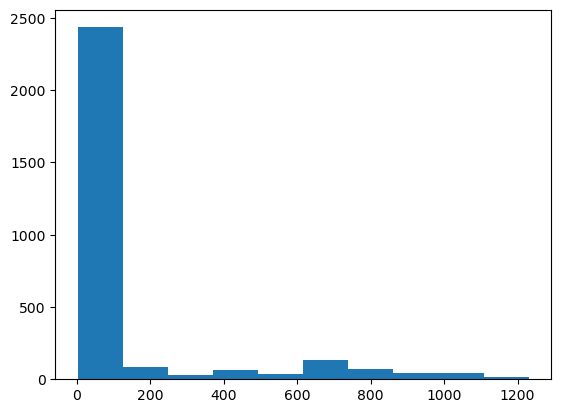

In [19]:
plt.hist(stock_data.Close)

/tmp/ipykernel_117/1231653583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<AxesSubplot: xlabel='Close', ylabel='Density'>

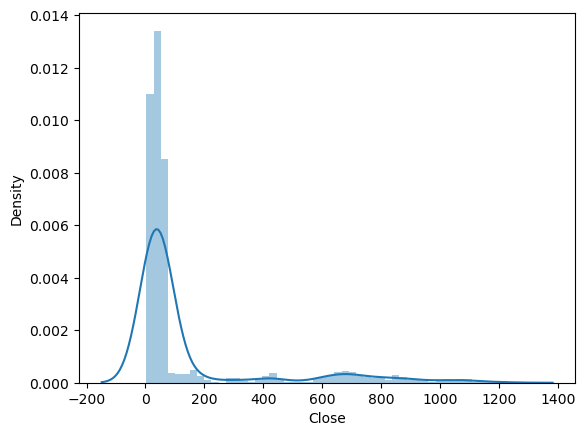

In [27]:
import seaborn as sns
sns.distplot(stock_data.Close)

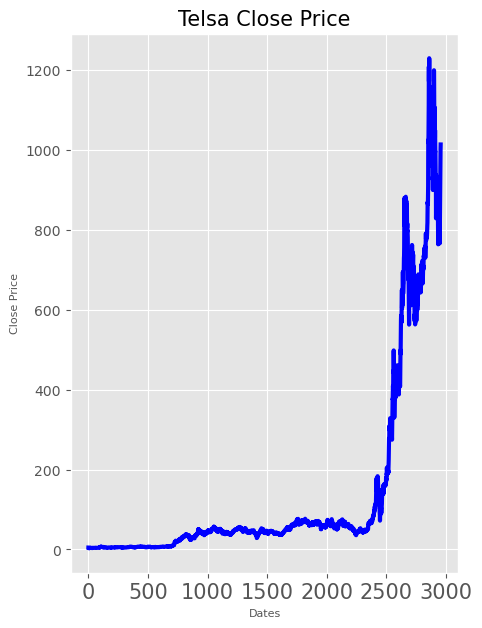

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.grid(True)
plt.xlabel("Dates",fontsize=8)
plt.xticks(fontsize=15)
plt.ylabel("Close Price",fontsize=8)
plt.xticks(fontsize=15)
plt.plot(stock_data["Close"], linewidth=3, color="blue")
plt.title("Telsa Close Price",fontsize=12)
plt.show()

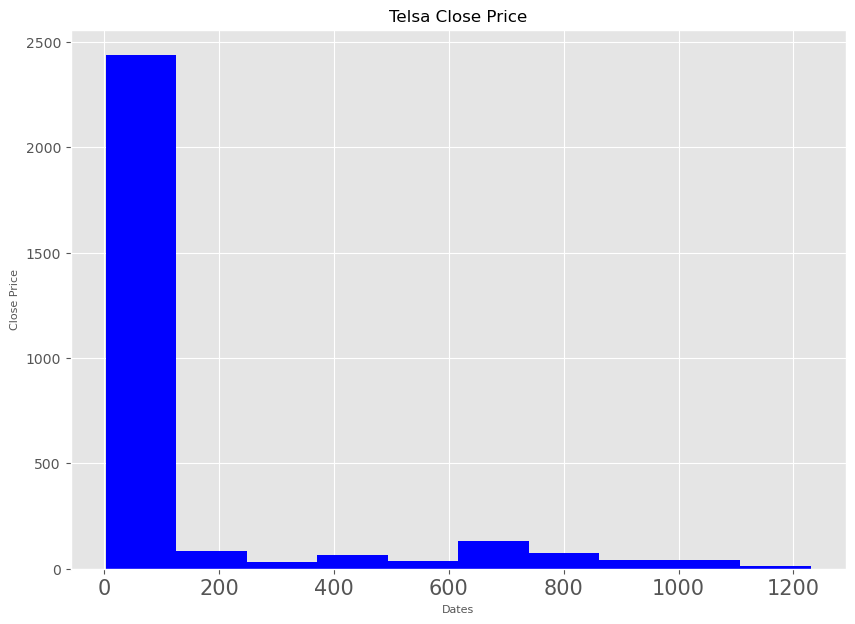

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.grid(True)
plt.xlabel("Dates",fontsize=8)
plt.xticks(fontsize=15)
plt.ylabel("Close Price",fontsize=8)
plt.xticks(fontsize=15)
plt.hist(stock_data["Close"], linewidth=3, color="blue")
plt.title("Telsa Close Price",fontsize=12)
plt.show()

### Distribution of Close Price

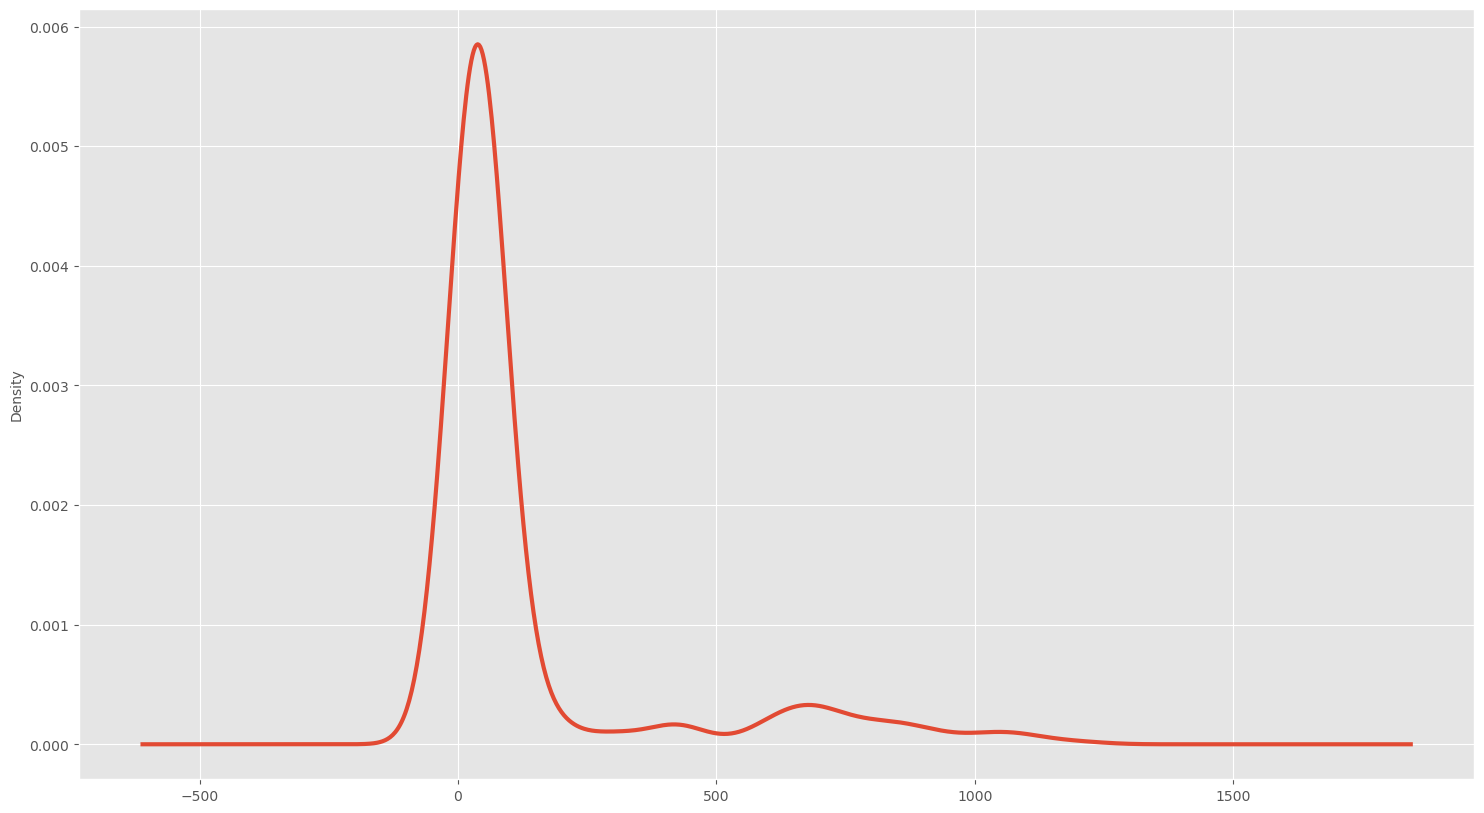

In [40]:
data_close=stock_data["Close"]
data_close.plot(kind='kde',figsize=(18,10),linewidth=3)
plt.xticks(fontsize=10)
plt.ylabel("Density",fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [45]:
rolmean=stock_data["Close"].rolling(365).mean()

In [46]:
rolestd=stock_data["Close"].rolling(365).std()

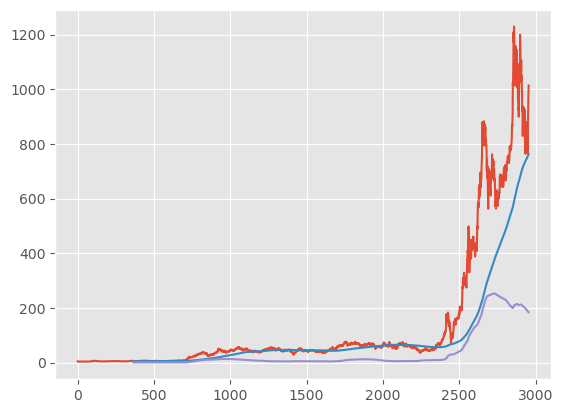

In [47]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolestd)

In [48]:
from statsmodels.tsa.stattools import adfuller

In [89]:
def test_stationarity(timeseries):
    rolemean=timeseries.rolling(12).mean()
    rolestd=timeseries.rolling(12).std()
    plt.figure(figsize=(18,8))
    plt.grid("both")
     
    plt.plot(timeseries,color="blue",label="original",linewidth=3)
    plt.plot(rolemean,color="red",label="mean",linewidth=3)
    plt.plot(rolestd,color="gray",label="standard",linewidth=3)
    
    plt.legend(loc="best",fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title("Rolling Mean and Standard Deviation",fontsize=25)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=20)
    
    plt.show(block=False)
    
    
    print("Result of the dickey Fuller Test")
    
    adft=adfuller(timeseries,autolag="AIC")
    
    output=pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','No of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key]=values
    print(output)

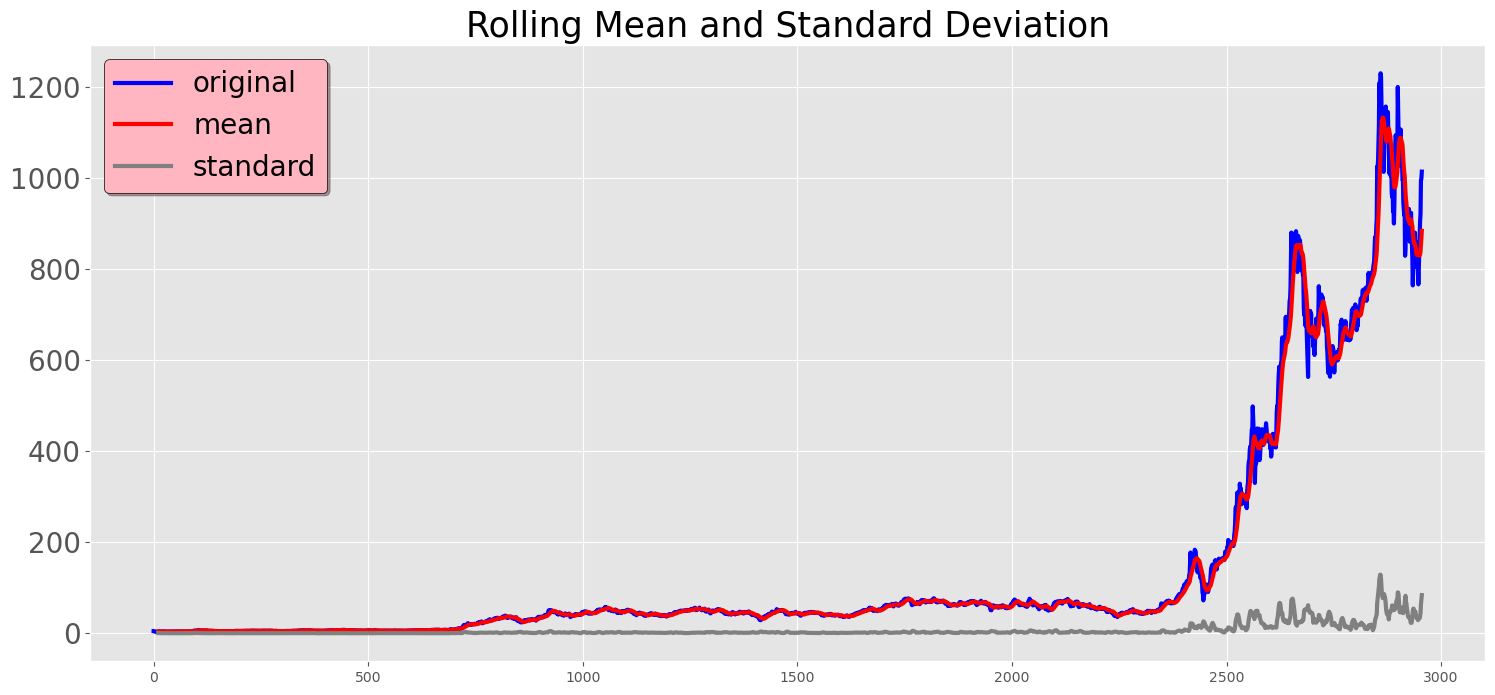

Result of the dickey Fuller Test
Test Statistics               1.423942
p-value                       0.997220
No. of lags used             28.000000
No of observations used    2927.000000
critical value (1%)          -3.432586
critical value (5%)          -2.862528
critical value (10%)         -2.567296
dtype: float64


In [90]:
test_stationarity(stock_data.Close)

<AxesSubplot: >

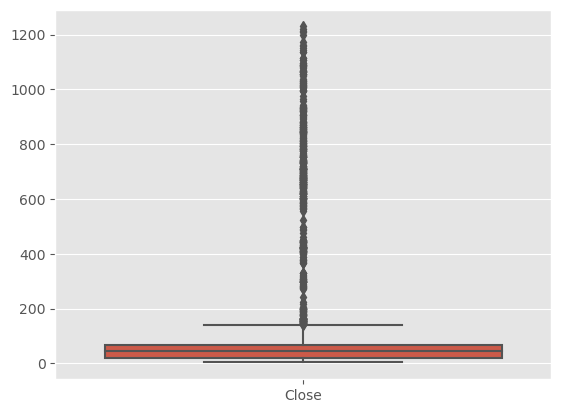

In [91]:
sns.boxplot(stock_data)

In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


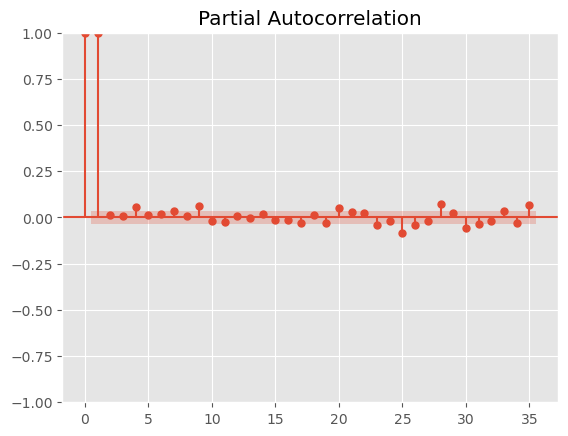

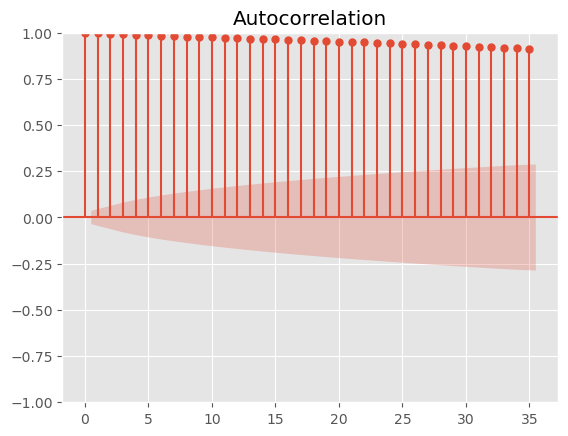

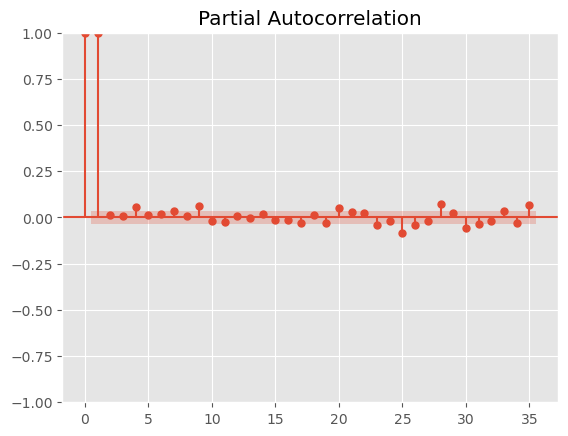

In [93]:
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose



In [95]:
result=seasonal_decompose(stock_data[["Close"]],period=12)

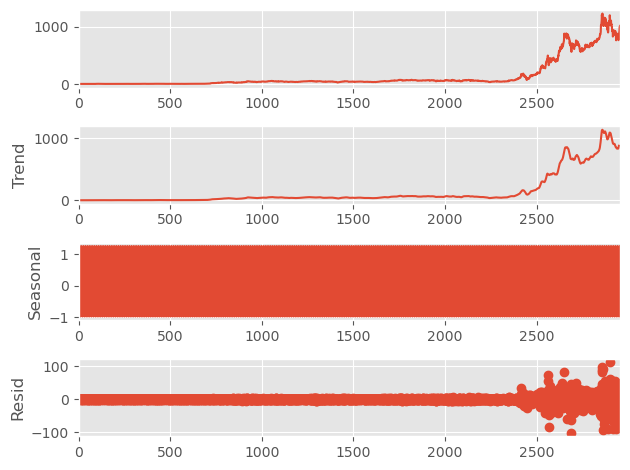

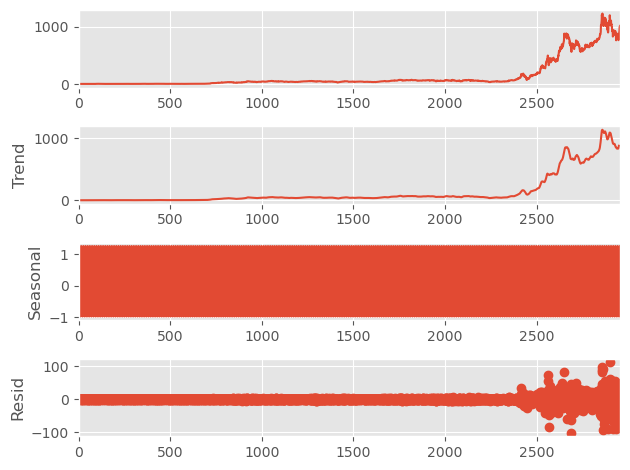

In [96]:
result.plot()

### Preprocessing 

In [97]:
df_close=stock_data["Close"]

In [98]:
df_close=stock_data["Close"].diff()

In [99]:
df_close=df_close.dropna()

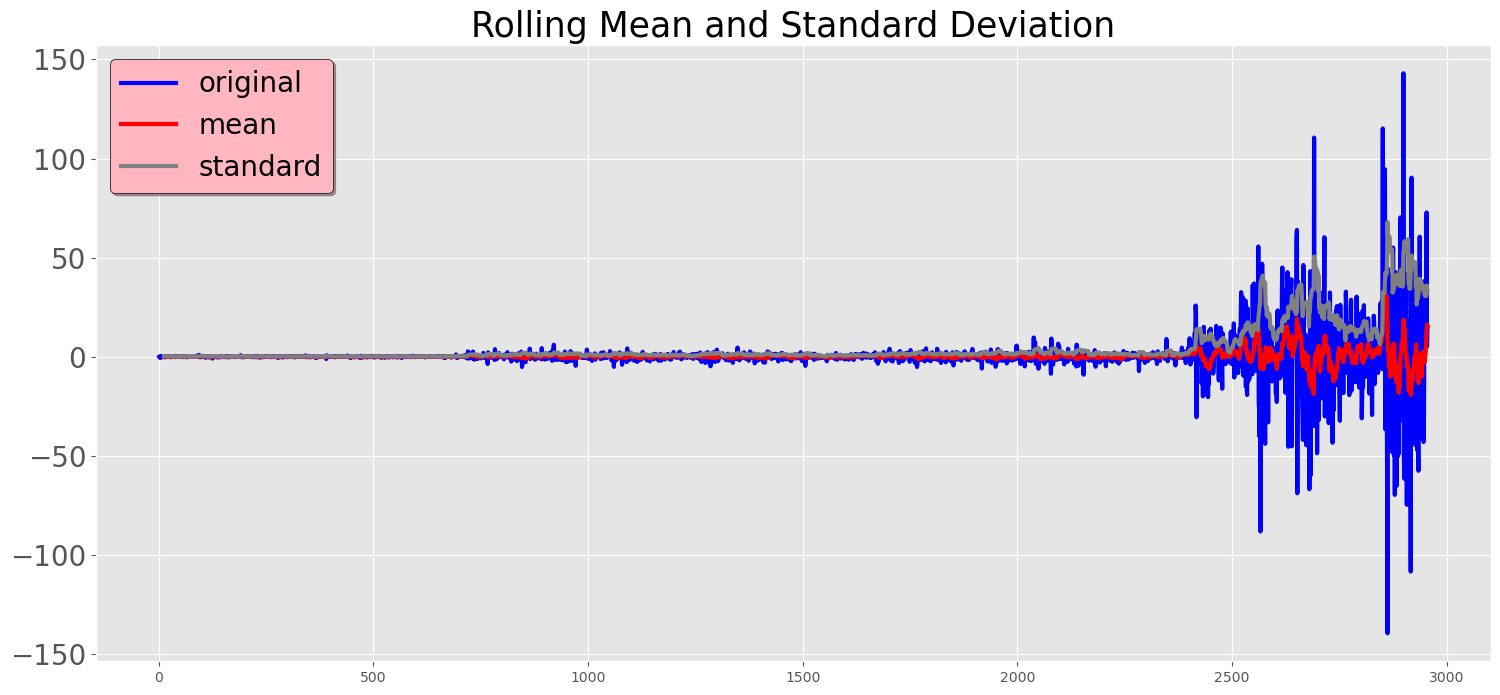

Result of the dickey Fuller Test
Test Statistics           -9.844955e+00
p-value                    4.646088e-17
No. of lags used           2.800000e+01
No of observations used    2.926000e+03
critical value (1%)       -3.432587e+00
critical value (5%)       -2.862528e+00
critical value (10%)      -2.567296e+00
dtype: float64


In [100]:
test_stationarity(df_close)

/tmp/ipykernel_117/1655373356.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_data=df_close[0:-60]
/tmp/ipykernel_117/1655373356.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_data=df_close[-60:]


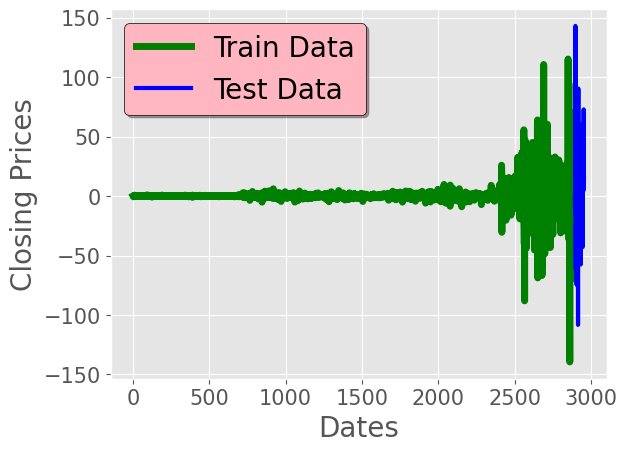

In [102]:
### Split the data into train and test 
train_data=df_close[0:-60]
test_data=df_close[-60:]

plt.grid("both")
plt.xlabel("Dates",fontsize=20)
plt.ylabel("Closing Prices",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot(train_data,'green',label='Train Data',linewidth=5)
plt.plot(test_data,'blue',label="Test Data",linewidth=3)

plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')